In [32]:
import tensorflow.keras as keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, Flatten, MaxPooling2D
from tensorflow.keras.optimizers import RMSprop

In [33]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [34]:
from tensorflow.keras import backend as K

In [35]:
if K.image_data_format() == 'channels_first':
    train_images = train_images.reshape(train_images.shape[0], 1, 28, 28)
    test_images = test_images.reshape(test_images.shape[0], 1, 28, 28)
    input_shape = (1, 28, 28)
else:
    train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
    test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)
    input_shape = (28, 28, 1)
    
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
train_images /= 255
test_images /= 255

In [36]:
train_labels = keras.utils.to_categorical(train_labels, 10)
test_labels = keras.utils.to_categorical(test_labels, 10)

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


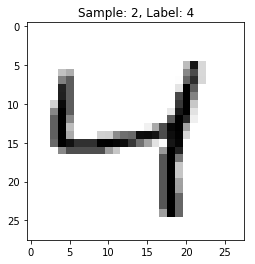

In [37]:
import matplotlib.pyplot as plt

def display_sample(num):
    print(train_labels[num])
    label = train_labels[num].argmax(axis=0)
    image = train_images[num].reshape([28, 28])
    plt.title('Sample: {}, Label: {}'.format(num, label))
    plt.imshow(image, cmap=plt.get_cmap('gray_r'))
    plt.show()
    
display_sample(2)

In [39]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3),
                activation='relu',
                input_shape=input_shape))

model.add(Conv2D(64, (3, 3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(10, activation='softmax'))

In [40]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
__________

In [41]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [42]:
history = model.fit(train_images, train_labels, batch_size=32, epochs=10, verbose=2,
                   validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10


KeyboardInterrupt: 

In [ ]:
score = model.evaluate(test_images, test_labels, verbose=0)
print('Test loss: ', score[0])
print('Test accuracy: ', score[1])